In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.manifold import TSNE

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# df = pd.read_csv("teste.csv", index_col=0)

In [45]:
# df[df['ID Aluno']==208149] #id
import warnings
warnings.filterwarnings('ignore')

In [46]:
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# preparing data

In [47]:
primeiroCiC = ['116301', '118001', '118010', '113034', '140481', '145971']
segundoCiC = ['116319', '115045', '118028', '118036', '113042']
terceiroCiC = ['118044', '118052', '113956', '113051', '117366']


primeiroLic1 =['116793', '117366', '145971', '147389', '194221']
segundoLic1 = ['113034', '116301', '125156']
terceiroLic1 = ['115045', '116319', '125172']

primeiroLic2 =['113492', '194221', '113450', '113476']
segundoLic2 = ['113034', '116319', '191027', '150649', '194280']
terceiroLic2 = ['115045', '113093', '117366', '117889']

primeiroEngComp =['113034', '113093', '113476', '117528', '118001', '118010']
segundoEngComp = ['118028', '118036', '113042', '115045', '116319']
terceiroEngComp =['113051', '117242', '170054', '201600', '206075']


primeiroMec = ['114626', '114634', '118010', '113476', '113034', '118001', '168891']
segundoMec = ['168891', '113093', '118028', '118036', '115045', '168874']
terceiroMec = ['113051', '118044', '118052', '168769', '116319']

primeiroRedes = ['113034', '113093', '118001', '118010', '167959']
segundoRedes = ['113042', '115045', '118028', '118036', '169676']
terceiroRedes = ['113051', '113301', '167983', '169749']


undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]#, 'Ingresso_unb'

In [48]:
df0 = pd.read_csv("aluno_quant_Materias_Media_nao_cotistas_0.csv", index_col=0)
df1 = pd.read_csv("aluno_quant_Materias_Media_nao_cotistas_1.csv", index_col=0)
df2 = pd.read_csv("aluno_quant_Materias_Media_nao_cotistas_2.csv", index_col=0)
df3 = pd.read_csv("aluno_quant_Materias_Media_nao_cotistas_3.csv", index_col=0)
df4 = pd.read_csv("aluno_quant_Materias_Media_nao_cotistas_4.csv", index_col=0)
df5 = pd.read_csv("aluno_quant_Materias_Media_nao_cotistas_5.csv", index_col=0)

In [49]:
dfComp = df0[undropableCol+primeiroLic1+segundoLic1+terceiroLic1].fillna(-1)
dfRedes = df1[undropableCol+primeiroRedes+segundoRedes+terceiroRedes].fillna(-1)
dfCic = df2[undropableCol+primeiroCiC+segundoCiC+terceiroCiC].fillna(-1) 
dfMec = df3[undropableCol+primeiroMec+segundoMec+terceiroMec].fillna(-1) 
dfEng = df4[undropableCol+primeiroEngComp+segundoEngComp+terceiroEngComp].fillna(-1) 

# PCA

In [50]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [51]:
def PCA (df, currentLabel = 'saiu'):
    data = (
        df

    )
    
    x = data.iloc[:].values
    y = data[currentLabel].values

    data[currentLabel]
    numColors = len(data[currentLabel].unique())

    sklearn_pca = sklearnPCA(n_components=2)

    Y_sklearn = sklearn_pca.fit_transform(x)

    cmap = get_cmap(numColors+1)
    colorList = [cmap(i) for i in range(1, numColors+1)]


    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(15, 10))
        for lab, col in zip(data[currentLabel].unique(),
                            colorList):
            plt.scatter(Y_sklearn[y==lab, 0],
                        Y_sklearn[y==lab, 1],
                        label=lab,
                        c=col)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    plt.show()

# TSNE

In [52]:
def formatColor(color):
    return 'rgb('+str(int(color[0]*255))+','+str(int(color[1]*255))+','+str(int(color[2]*255))+')'

    
def tsne(df, currentLabel = 'saiu'):
    a = df
    X = a.values
    X_embedded = TSNE(n_components=2).fit_transform(X)
    
    
    data = a
    Y_sklearn = X_embedded
    y = data[currentLabel].values
    numColors = len(data[currentLabel].unique())

    cmap = get_cmap(numColors+1)
    colorList = [cmap(i) for i in range(1, numColors+1)]


    traceArr = []
    for lab, col in zip(data[currentLabel].unique(),
                        colorList):
        
        trace1 = go.Scatter(
            x=Y_sklearn[y==lab, 0],
            y=Y_sklearn[y==lab, 1],
#             z=Y_sklearn[y==lab, 2],
            mode='markers',
            name = str(lab),
            marker=dict(
                size=5,
                color=formatColor(col),
                opacity=0.8
            )
        )
        traceArr.append(trace1)

    data = traceArr
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')

In [53]:
# draw2dFrame(a, X_embedded, 'saiu')

# knn

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import StratifiedKFold

In [55]:
# a = a[a["saiu"]!=0]
# y = a["saiu"]
# X = a.drop(["saiu"], axis = 1)

In [56]:

def knn (df, currentLabel = 'saiu'):
    a = df[df[currentLabel]!=0]
    y = a[currentLabel]
    X = a.drop([currentLabel], axis=1)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()  
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)  
    
    classifier = KNeighborsClassifier(n_neighbors=2)  
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    
def knncv (df, currentLabel = 'saiu'):
    a = df[df[currentLabel]!=0]
    y = a[currentLabel]
    X = a.drop([currentLabel], axis=1)
    X = X.values
    y = y.values
    skf = StratifiedKFold(n_splits=5)
#     print(skf.split(X, y))
    array = []
    for train, test in skf.split(X, y):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        X_train = X[train]
        X_test = X[test]
        y_train = y[train]
        y_test = y[test]
        scaler = StandardScaler()  
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)  
        X_test = scaler.transform(X_test)  

        classifier = KNeighborsClassifier(n_neighbors=2)  
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        print(confusion_matrix(y_test, y_pred))  
        print(classification_report(y_test, y_pred))
        array.append(classification_report(y_test, y_pred, output_dict = True))
#         print(X[train])
    print(array[1]['-1']['precision'])
    


In [57]:
knncv(dfCic)

[[137  13]
 [ 61  99]]
              precision    recall  f1-score   support

          -1       0.69      0.91      0.79       150
           1       0.88      0.62      0.73       160

    accuracy                           0.76       310
   macro avg       0.79      0.77      0.76       310
weighted avg       0.79      0.76      0.76       310

[[135  15]
 [ 26 134]]
              precision    recall  f1-score   support

          -1       0.84      0.90      0.87       150
           1       0.90      0.84      0.87       160

    accuracy                           0.87       310
   macro avg       0.87      0.87      0.87       310
weighted avg       0.87      0.87      0.87       310

[[146   4]
 [ 38 122]]
              precision    recall  f1-score   support

          -1       0.79      0.97      0.87       150
           1       0.97      0.76      0.85       160

    accuracy                           0.86       310
   macro avg       0.88      0.87      0.86       310
weigh

In [58]:
# scaler = StandardScaler()  
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)  

In [59]:
# classifier = KNeighborsClassifier(n_neighbors=2)  
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)  

In [60]:
 
# print(confusion_matrix(y_test, y_pred))  
# print(classification_report(y_test, y_pred))
# knn(X, y)

In [61]:
# a

# correlação heatmap

In [62]:
def corrMat(df):
    f = (df).corr('spearman')
    plt.figure(figsize=(16, 6))
    sns.heatmap(f, annot=True)


# gradient boosting

In [63]:
from sklearn import ensemble

def gradent(df, currentLabel = 'saiu'):
    params = {
        'n_estimators': 150,
        'max_depth': 6,
        'learning_rate': 0.1,
        'criterion': 'friedman_mse'
    }
    
    a = df[df[currentLabel]!=0]
    y = a[currentLabel]
    X = a.drop([currentLabel], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    
    gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

    gradient_boosting_regressor.fit(X_train, y_train)
    
    y_pred = gradient_boosting_regressor.predict(X_test)
    y_pred = (y_pred>0)*1
    y_pred = np.array([x if x !=0 else -1 for x in y_pred])
#     print (y_pred)
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    
def gradentcv(df, currentLabel = 'saiu'):
    params = {
        'n_estimators': 150,
        'max_depth': 6,
        'learning_rate': 0.1,
        'criterion': 'friedman_mse'
    }
    
    a = df[df[currentLabel]!=0]
    y = a[currentLabel]
    X = a.drop([currentLabel], axis=1)
    X = X.values
    y = y.values
    skf = StratifiedKFold(n_splits=5)
    
    
    array = []
    for train, test in skf.split(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        X_train = X[train]
        X_test = X[test]
        y_train = y[train]
        y_test = y[test]
        
#         scaler = StandardScaler()  
#         scaler.fit(X_train)

#         X_train = scaler.transform(X_train)  
#         X_test = scaler.transform(X_test)  

        
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

        gradient_boosting_regressor.fit(X_train, y_train)

        y_pred = gradient_boosting_regressor.predict(X_test)
        y_pred = (y_pred>0)*1
        y_pred = np.array([x if x !=0 else -1 for x in y_pred])
    #     print (y_pred)
        print(confusion_matrix(y_test, y_pred))  
        print(classification_report(y_test, y_pred))
        array.append(classification_report(y_test, y_pred, output_dict = True))
#         print(X[train])
    print(array[1]['-1']['precision'])

In [64]:
gradent(dfComp)

[[ 42  14]
 [ 18 118]]
              precision    recall  f1-score   support

          -1       0.70      0.75      0.72        56
           1       0.89      0.87      0.88       136

    accuracy                           0.83       192
   macro avg       0.80      0.81      0.80       192
weighted avg       0.84      0.83      0.83       192



In [65]:
gradentcv(dfComp)

[[ 38  17]
 [ 21 116]]
              precision    recall  f1-score   support

          -1       0.64      0.69      0.67        55
           1       0.87      0.85      0.86       137

    accuracy                           0.80       192
   macro avg       0.76      0.77      0.76       192
weighted avg       0.81      0.80      0.80       192

[[ 29  26]
 [ 16 121]]
              precision    recall  f1-score   support

          -1       0.64      0.53      0.58        55
           1       0.82      0.88      0.85       137

    accuracy                           0.78       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192

[[ 28  27]
 [  4 133]]
              precision    recall  f1-score   support

          -1       0.88      0.51      0.64        55
           1       0.83      0.97      0.90       137

    accuracy                           0.84       192
   macro avg       0.85      0.74      0.77       192
weigh

## Comp

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


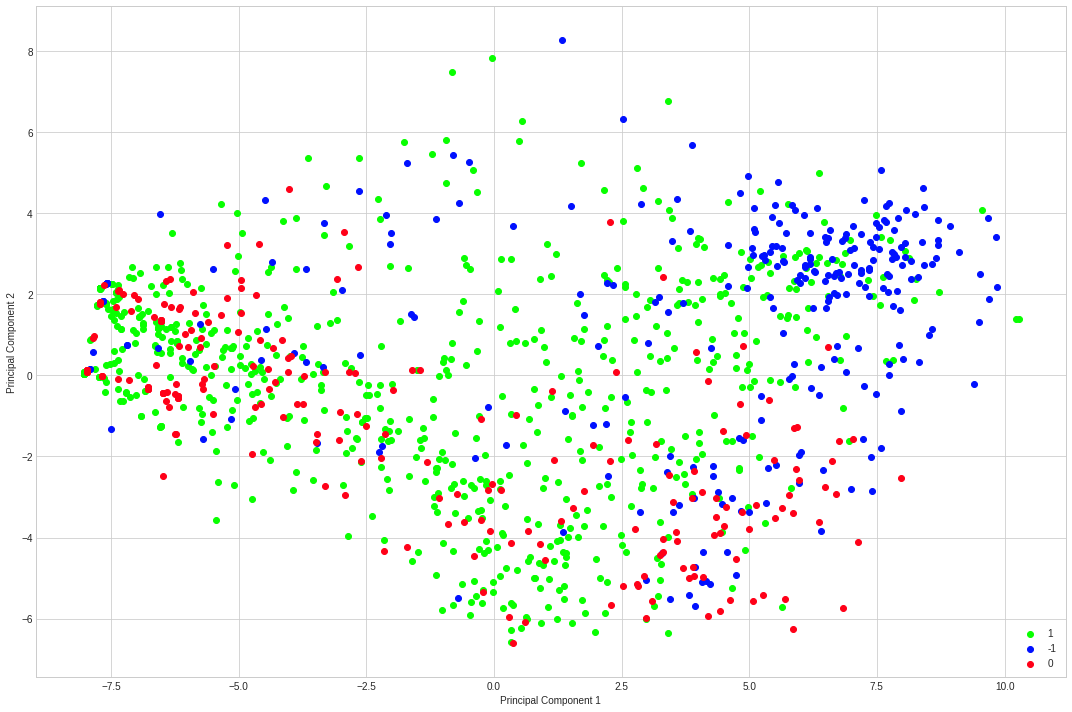

In [66]:
PCA(dfComp)

In [67]:
tsne(dfComp)

In [68]:
knn(dfComp)

[[ 38  18]
 [ 31 105]]
              precision    recall  f1-score   support

          -1       0.55      0.68      0.61        56
           1       0.85      0.77      0.81       136

    accuracy                           0.74       192
   macro avg       0.70      0.73      0.71       192
weighted avg       0.77      0.74      0.75       192



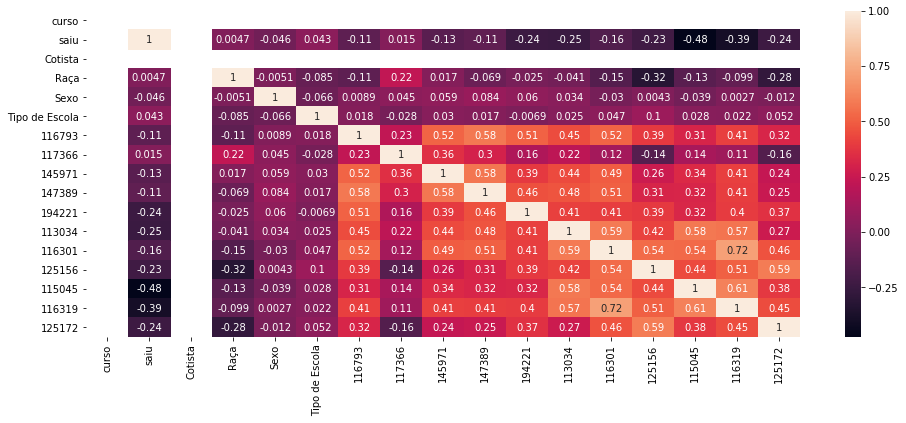

In [69]:
corrMat(dfComp)

In [70]:
gradent(dfComp)

[[ 33  22]
 [ 18 119]]
              precision    recall  f1-score   support

          -1       0.65      0.60      0.62        55
           1       0.84      0.87      0.86       137

    accuracy                           0.79       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.79      0.79      0.79       192



In [71]:
gradentcv(dfComp)

[[ 41  14]
 [ 22 115]]
              precision    recall  f1-score   support

          -1       0.65      0.75      0.69        55
           1       0.89      0.84      0.86       137

    accuracy                           0.81       192
   macro avg       0.77      0.79      0.78       192
weighted avg       0.82      0.81      0.82       192

[[ 30  25]
 [ 16 121]]
              precision    recall  f1-score   support

          -1       0.65      0.55      0.59        55
           1       0.83      0.88      0.86       137

    accuracy                           0.79       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.78      0.79      0.78       192

[[ 30  25]
 [  2 135]]
              precision    recall  f1-score   support

          -1       0.94      0.55      0.69        55
           1       0.84      0.99      0.91       137

    accuracy                           0.86       192
   macro avg       0.89      0.77      0.80       192
weigh

## Redes

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


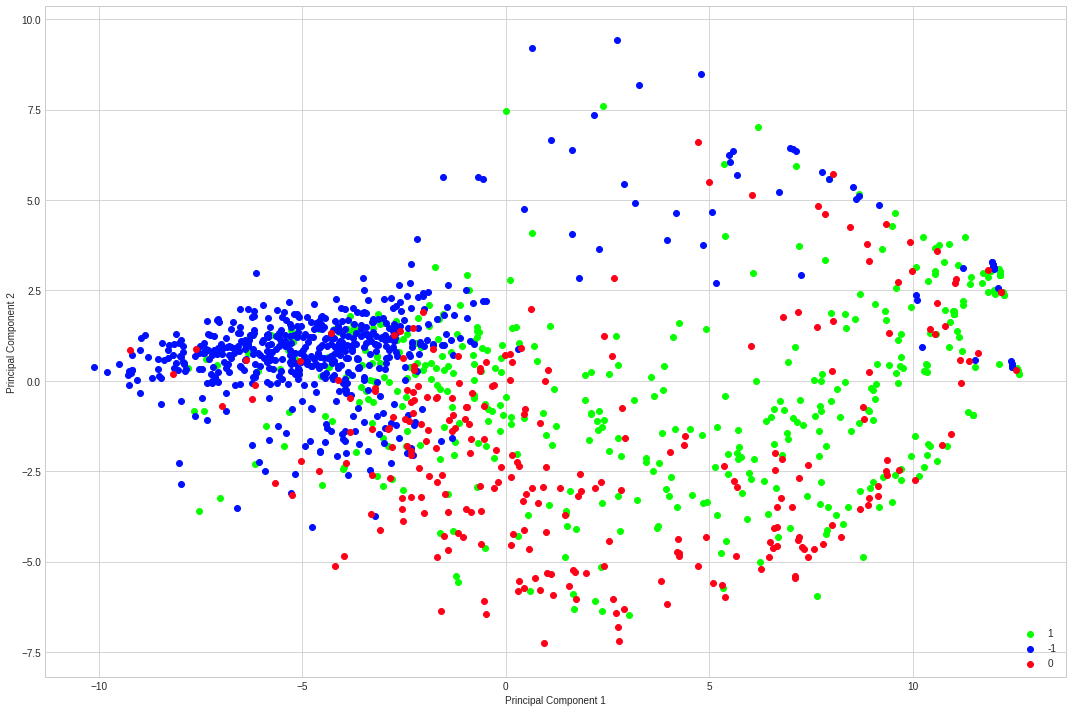

In [72]:
PCA(dfRedes)

In [73]:
tsne(dfRedes)

In [74]:
knn(dfRedes)

[[118   6]
 [ 32  47]]
              precision    recall  f1-score   support

          -1       0.79      0.95      0.86       124
           1       0.89      0.59      0.71        79

    accuracy                           0.81       203
   macro avg       0.84      0.77      0.79       203
weighted avg       0.83      0.81      0.80       203



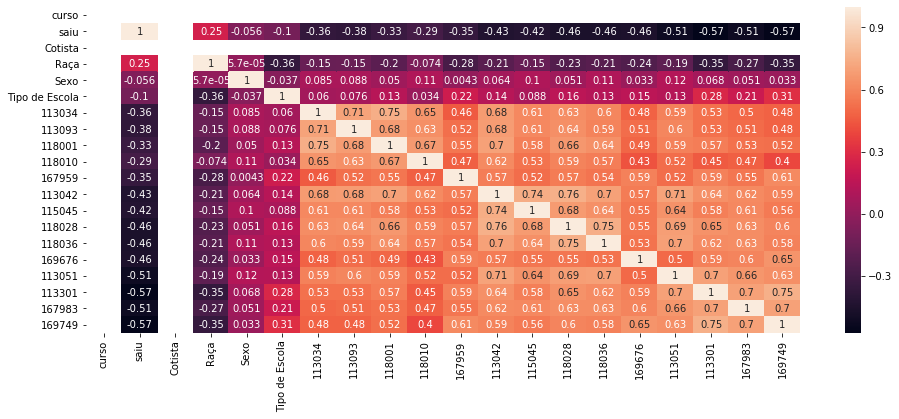

In [75]:
corrMat(dfRedes)

In [76]:
gradentcv(dfRedes)

[[106  11]
 [ 38  48]]
              precision    recall  f1-score   support

          -1       0.74      0.91      0.81       117
           1       0.81      0.56      0.66        86

    accuracy                           0.76       203
   macro avg       0.77      0.73      0.74       203
weighted avg       0.77      0.76      0.75       203

[[81 36]
 [ 7 79]]
              precision    recall  f1-score   support

          -1       0.92      0.69      0.79       117
           1       0.69      0.92      0.79        86

    accuracy                           0.79       203
   macro avg       0.80      0.81      0.79       203
weighted avg       0.82      0.79      0.79       203

[[77 40]
 [16 69]]
              precision    recall  f1-score   support

          -1       0.83      0.66      0.73       117
           1       0.63      0.81      0.71        85

    accuracy                           0.72       202
   macro avg       0.73      0.73      0.72       202
weighted avg 

## Mec

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


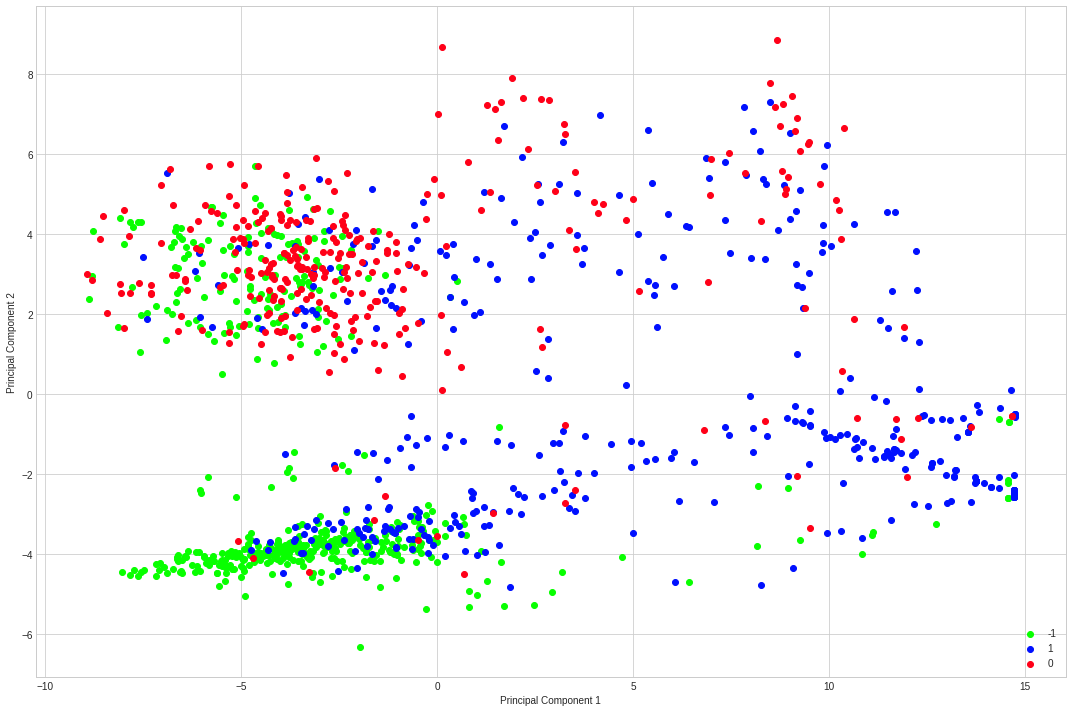

In [77]:
PCA(dfMec)

In [78]:
tsne(dfMec)

In [79]:
knn(dfMec)

[[97  5]
 [20 58]]
              precision    recall  f1-score   support

          -1       0.83      0.95      0.89       102
           1       0.92      0.74      0.82        78

    accuracy                           0.86       180
   macro avg       0.87      0.85      0.85       180
weighted avg       0.87      0.86      0.86       180



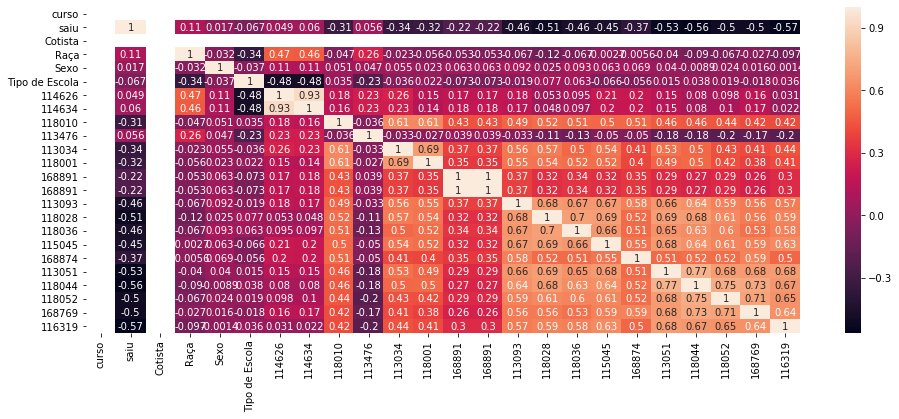

In [80]:
corrMat(dfMec)

In [81]:
gradentcv(dfMec)

[[90 11]
 [25 55]]
              precision    recall  f1-score   support

          -1       0.78      0.89      0.83       101
           1       0.83      0.69      0.75        80

    accuracy                           0.80       181
   macro avg       0.81      0.79      0.79       181
weighted avg       0.81      0.80      0.80       181

[[81 19]
 [16 64]]
              precision    recall  f1-score   support

          -1       0.84      0.81      0.82       100
           1       0.77      0.80      0.79        80

    accuracy                           0.81       180
   macro avg       0.80      0.81      0.80       180
weighted avg       0.81      0.81      0.81       180

[[32 68]
 [ 4 76]]
              precision    recall  f1-score   support

          -1       0.89      0.32      0.47       100
           1       0.53      0.95      0.68        80

    accuracy                           0.60       180
   macro avg       0.71      0.64      0.57       180
weighted avg     

# CIC

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


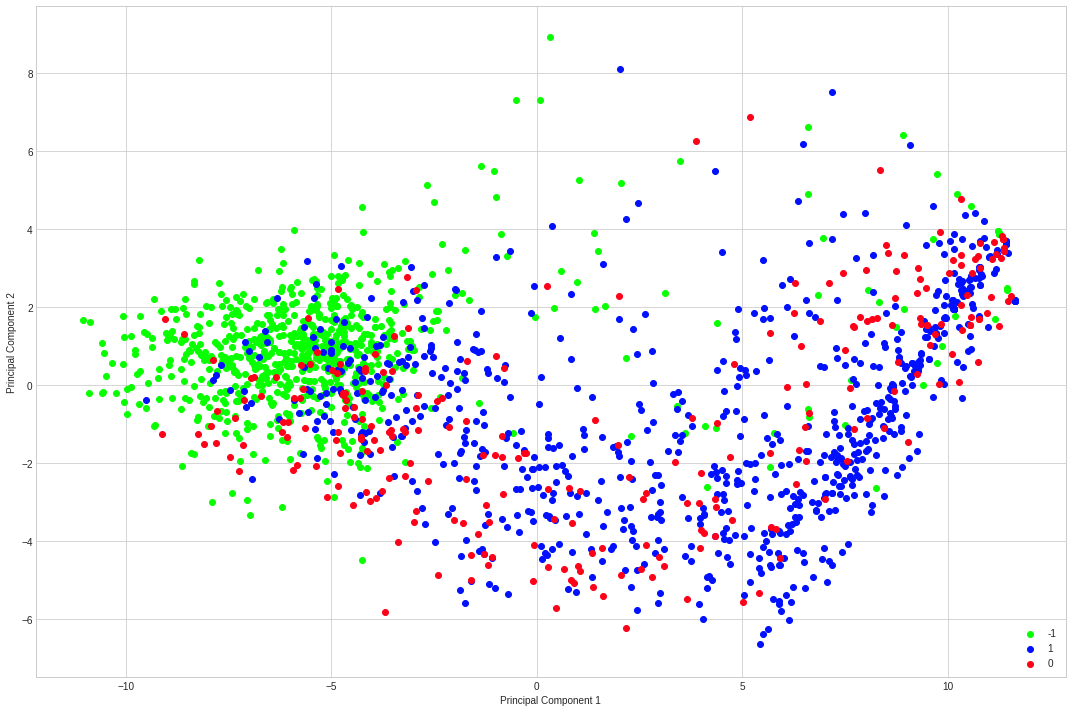

In [82]:
PCA(dfCic)

In [83]:
tsne(dfCic)

In [84]:
knn(dfCic)

[[142   3]
 [ 42 123]]
              precision    recall  f1-score   support

          -1       0.77      0.98      0.86       145
           1       0.98      0.75      0.85       165

    accuracy                           0.85       310
   macro avg       0.87      0.86      0.85       310
weighted avg       0.88      0.85      0.85       310



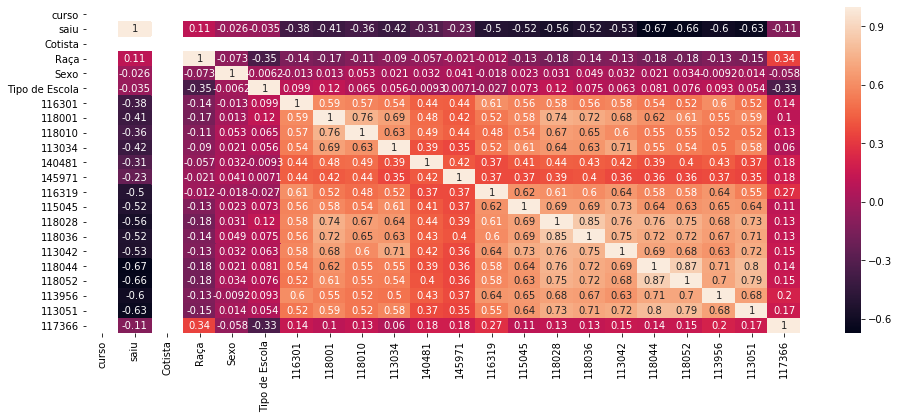

In [85]:
corrMat(dfCic)

In [86]:
gradentcv(dfCic)

[[140  10]
 [ 30 130]]
              precision    recall  f1-score   support

          -1       0.82      0.93      0.87       150
           1       0.93      0.81      0.87       160

    accuracy                           0.87       310
   macro avg       0.88      0.87      0.87       310
weighted avg       0.88      0.87      0.87       310

[[125  25]
 [  8 152]]
              precision    recall  f1-score   support

          -1       0.94      0.83      0.88       150
           1       0.86      0.95      0.90       160

    accuracy                           0.89       310
   macro avg       0.90      0.89      0.89       310
weighted avg       0.90      0.89      0.89       310

[[128  22]
 [ 31 129]]
              precision    recall  f1-score   support

          -1       0.81      0.85      0.83       150
           1       0.85      0.81      0.83       160

    accuracy                           0.83       310
   macro avg       0.83      0.83      0.83       310
weigh

# Eng

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


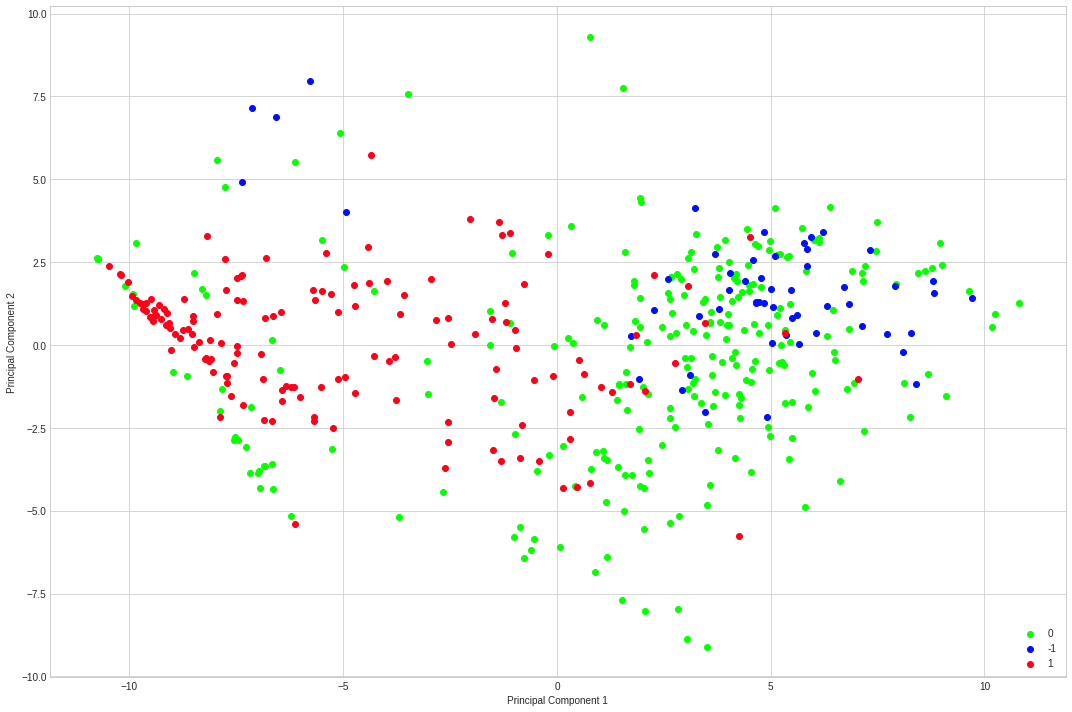

In [87]:
PCA(dfEng)

In [88]:
tsne(dfEng)

In [89]:
knn(dfEng)

[[ 9  0]
 [ 3 29]]
              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         9
           1       1.00      0.91      0.95        32

    accuracy                           0.93        41
   macro avg       0.88      0.95      0.90        41
weighted avg       0.95      0.93      0.93        41



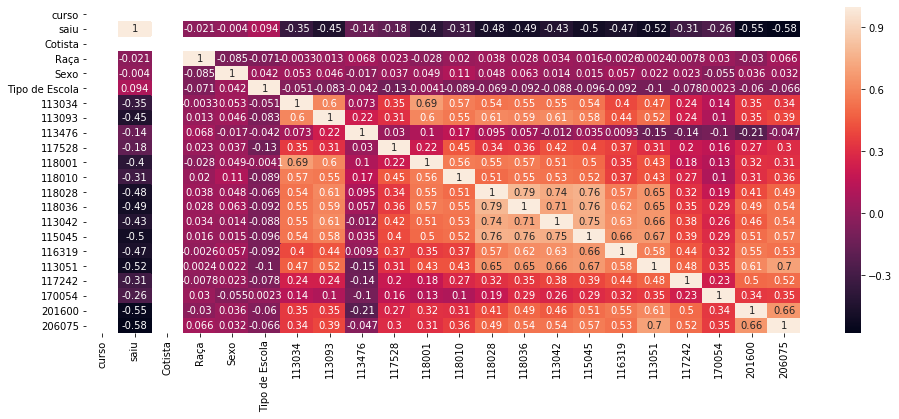

In [90]:
corrMat(dfEng)

In [91]:
gradentcv(dfEng)

[[ 8  3]
 [ 1 29]]
              precision    recall  f1-score   support

          -1       0.89      0.73      0.80        11
           1       0.91      0.97      0.94        30

    accuracy                           0.90        41
   macro avg       0.90      0.85      0.87        41
weighted avg       0.90      0.90      0.90        41

[[11  0]
 [ 1 29]]
              precision    recall  f1-score   support

          -1       0.92      1.00      0.96        11
           1       1.00      0.97      0.98        30

    accuracy                           0.98        41
   macro avg       0.96      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41

[[ 9  2]
 [ 2 28]]
              precision    recall  f1-score   support

          -1       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        30

    accuracy                           0.90        41
   macro avg       0.88      0.88      0.88        41
weighted avg     